# Análise da Energia/Eletricidade no Mundo e os seus impactos a nível económico e climático

Datasets encontrados:<br> <br>
1. co2-per-capita-vs-renewable-electricity
2. primary-energy-source-bar
3. SYB64_263_202110_Production Trade and Supply of Energy
4. global-electricity-per-kwh-pricing-2021
5. gdp-per-capita-worldbank
6. GDP_countries


## Perguntas a responder
● Países que consomem mais energia pouco poluente (renovável + nuclear);

● Países que consomem mais energia poluente;

● Países que consomem mais energia nuclear;

● Transição global para energia renovável;

● Países com maior transição para energia renovável;

● Países que consomem mais energia;

● Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

● Países que produzem mais energia;

● Países que exportam mais energia;

● Países que importam mais energia;

● Correlação entre preço da eletricidade e percentagem de eletricidade proveniente de fontes renováveis;


### Descrição dos datasets

In [19]:
#import needed libraries & float format definition

import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,.5f}'.format

In [20]:
# Reading and showing head data

energySourceCountry = pd.read_csv("primary-energy-source-bar.csv")
co2PerCapita = pd.read_csv("co2-per-capita-vs-renewable-electricity.csv")
productionAndSupplyEnergy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding='latin-1')
electricityPrice2021 = pd.read_excel("global-electricity-per-kwh-pricing-2021.xlsx")
GDP_perCapita = pd.read_csv("gdp-per-capita-worldbank.csv")
GDPcountries = pd.read_excel("GDP_Countries.xlsx")



#### Pergunta 1: Análise dos  Países que consumiram mais energia pouco poluente (renovável + nuclear) em 2020 e que relação existe com o seu GDP?

Análise do GDP per capita

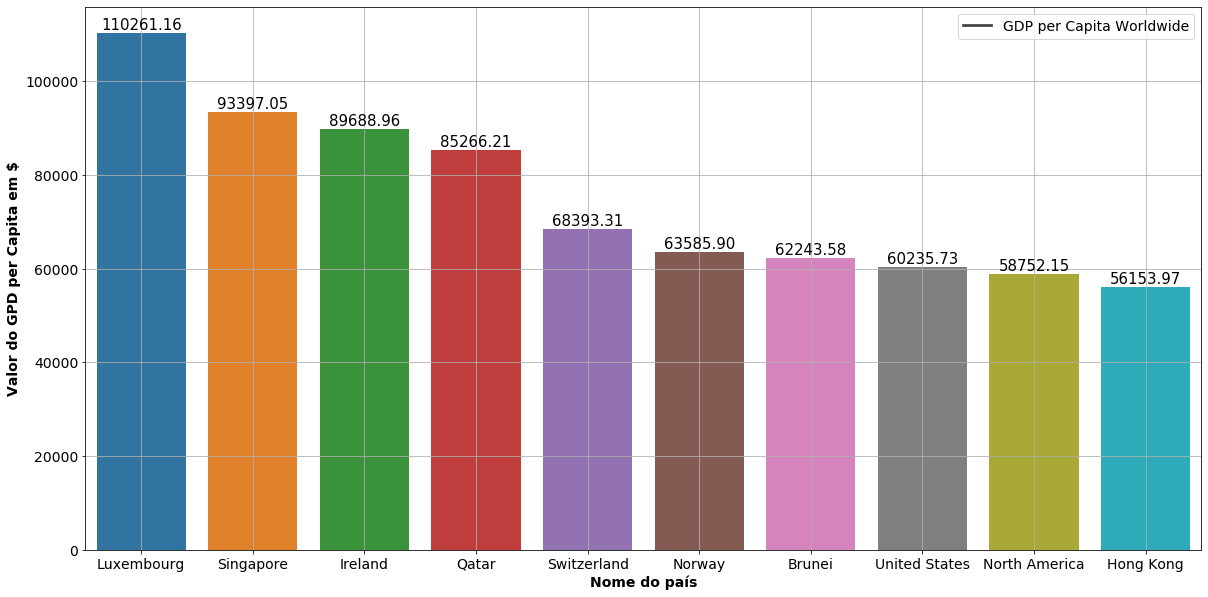

In [21]:
#Drop unwated data
GDP_perCapita = GDP_perCapita[GDP_perCapita['Year'].isin([2020])]
GDP_perCapita.rename(columns = {'GDP per capita, PPP (constant 2017 international $)':'GDP per capita'}, inplace = True)

GDP_perCapitaPlot = GDP_perCapita
GDP_perCapitaPlot = GDP_perCapitaPlot.sort_values(by=['GDP per capita'],ascending=False).iloc[:10]
#GDP_perCapitaPlot.plot.bar(x='Entity', y='GDP per capita', rot=0, grid=True, figsize=(20,10))

GDP_perCapitaPlot = pd.DataFrame(GDP_perCapitaPlot, columns=['Entity', 'GDP per capita'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="GDP per capita", data=GDP_perCapitaPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD per Capita em $', fontweight='bold')
plt.legend(['GDP per Capita Worldwide'])
plt.grid()
plt.show()

Análise do GDP de cada país

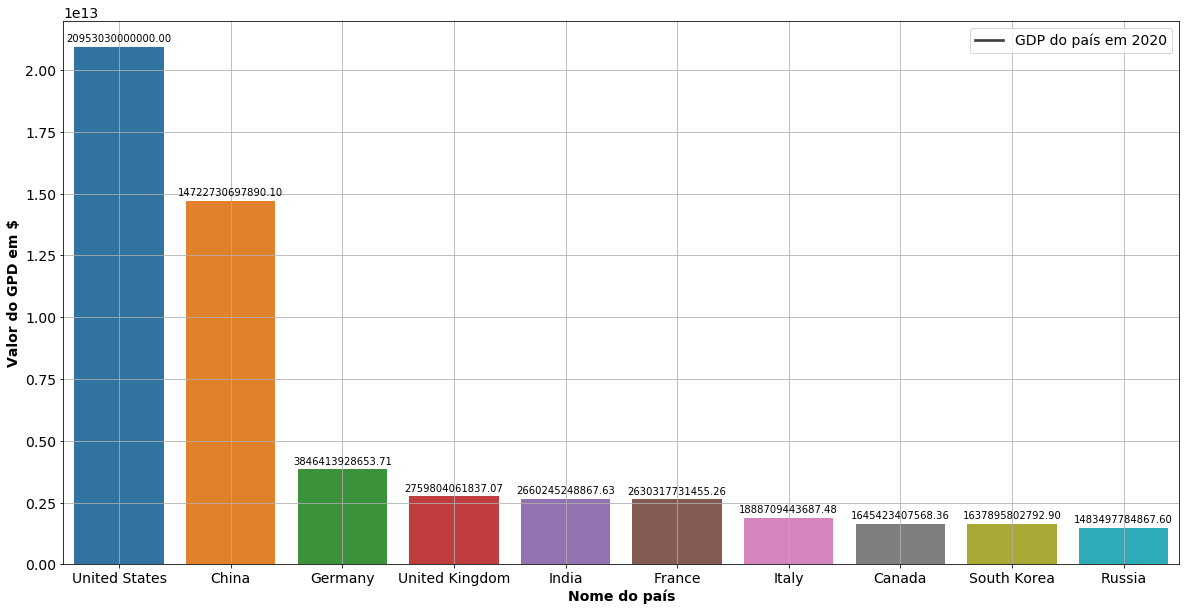

,Code,Country GDP 2020,Entity
0,AFG,"20,116,137,325.82060",Afghanistan
1,AGO,"58,375,976,292.96780",Angola
2,ALB,"14,887,629,268.29270",Albania
3,ARG,"389,288,056,265.32501",Argentina
4,ARM,"12,641,209,802.11200",Armenia
...,...,...,...
172,VUT,"881,547,928.58381",Vanuatu
173,WSM,"807,100,820.64813",Samoa
174,ZAF,"335,442,101,366.41699",South Africa
175,ZMB,"18,110,631,358.31140",Zambia


In [22]:
yearList = list(range(1960,2020))
yearList.append(2021)

GDPcountries1 = GDPcountries
GDPcountries1.drop(yearList, axis = 1, inplace = True, errors='ignore')
GDPcountries1.drop(['Indicator Code', 'Indicator Name'], axis = 1, inplace = True)
GDPcountries1.rename(columns = {2020:'Country GDP 2020'}, inplace = True)

GDPcountries1 = GDPcountries1.merge(GDP_perCapita[['Code','Entity']])

GDPcountriesPlot = GDPcountries1
GDPcountriesPlot = GDPcountriesPlot.sort_values(by=['Country GDP 2020'],ascending=False).iloc[:10]
#GDPcountriesPlot.plot.bar(x='Entity', y='Country GDP 2020', rot=0, grid=True, figsize=(20,10))


GDPcountriesPlot = pd.DataFrame(GDPcountriesPlot, columns=['Entity', 'Country GDP 2020'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="Country GDP 2020", data=GDPcountriesPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Valor do GPD em $', fontweight='bold')
plt.legend(['GDP do país em 2020'])
plt.grid()
plt.show()


GDPcountries1

Vamos agregar a tabela GDP_perCapita e GDPcountries de forma a conter os dois atributos para que possam ser comparados

In [23]:
#Merge GDP_perCapita with GDPcountries based on commom columns
GDP_perCapita_GDPcountries = pd.merge(GDP_perCapita, GDPcountries, 
                   on='Code', 
                   how='outer')
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.sort_values(by=['Country GDP 2020'],ascending=False)
GDP_perCapita_GDPcountries = GDP_perCapita_GDPcountries.loc[GDP_perCapita_GDPcountries['Country GDP 2020'].notna() & GDP_perCapita_GDPcountries['Entity'].notna()]

GDP_perCapita_GDPcountries
#newDataset.loc[newDataset['Code'] == 'USA']

,Entity,Code,Year,GDP per capita,Country GDP 2020
216,United States,USA,"2,020.00000","60,235.72849","20,953,030,000,000.00000"
79,China,CHN,"2,020.00000","16,410.79780","14,722,730,697,890.09961"
106,Germany,DEU,"2,020.00000","50,922.35802","3,846,413,928,653.70996"
215,United Kingdom,GBR,"2,020.00000","41,627.12927","2,759,804,061,837.06982"
119,India,IND,"2,020.00000","6,118.35733","2,660,245,248,867.62988"
...,...,...,...,...,...
183,Samoa,WSM,"2,020.00000","6,295.73184","807,100,820.64813"
91,Dominica,DMA,"2,020.00000","9,891.29194","504,214,814.81482"
184,Sao Tome and Principe,STP,"2,020.00000","4,051.60484","472,914,469.91933"
130,Kiribati,KIR,"2,020.00000","2,291.90722","197,508,774.34451"


Criação da tabela countryEnergy àqual se vai inserir uma nova coluna (renewable_nuclear) que irá conter a soma do consumo da energia: Nuclear + Hídrica + Eólica + Solar + Biomassa.

De seguida, ordenamos a tabela pela coluna que acabámos de criar de forma descendente e ficamos com os países cujo Code não seja NULL e cujo ano seja 2020 e fazemos um gráfico de barras com o TOP 5 de maiores consumidores.

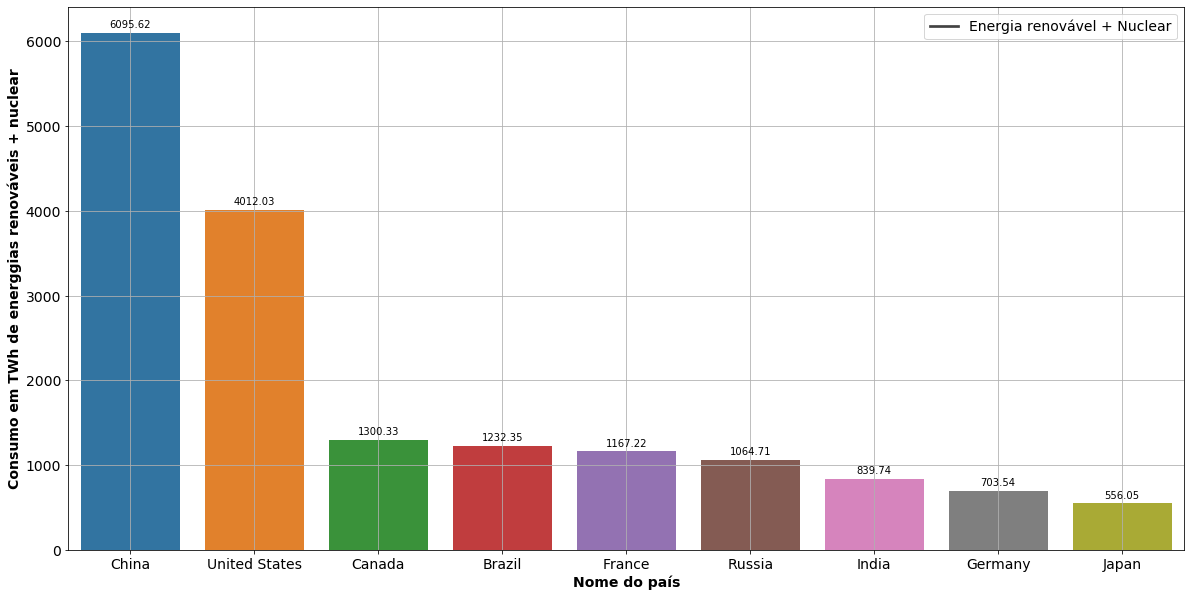

In [24]:
countryEnergy = energySourceCountry
countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']

countryEnergy = countryEnergy.sort_values(by=['renewable_nuclear'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)]
countryEnergyPlot = countryEnergy.iloc[1:10]
#countryEnergyPlot.plot.bar(x='Entity', y='renewable_nuclear', rot=0, grid=True, figsize=(20,10))


countryEnergyPlot = pd.DataFrame(countryEnergyPlot, columns=['Entity', 'renewable_nuclear'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="renewable_nuclear", data=countryEnergyPlot)

for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energgias renováveis + nuclear', fontweight='bold')
plt.legend(['Energia renovável + Nuclear'])
plt.grid()
plt.show()



Comparação entre energia consumida e a quantidade dela que é renovável ou nuclear (países que consomem mais)

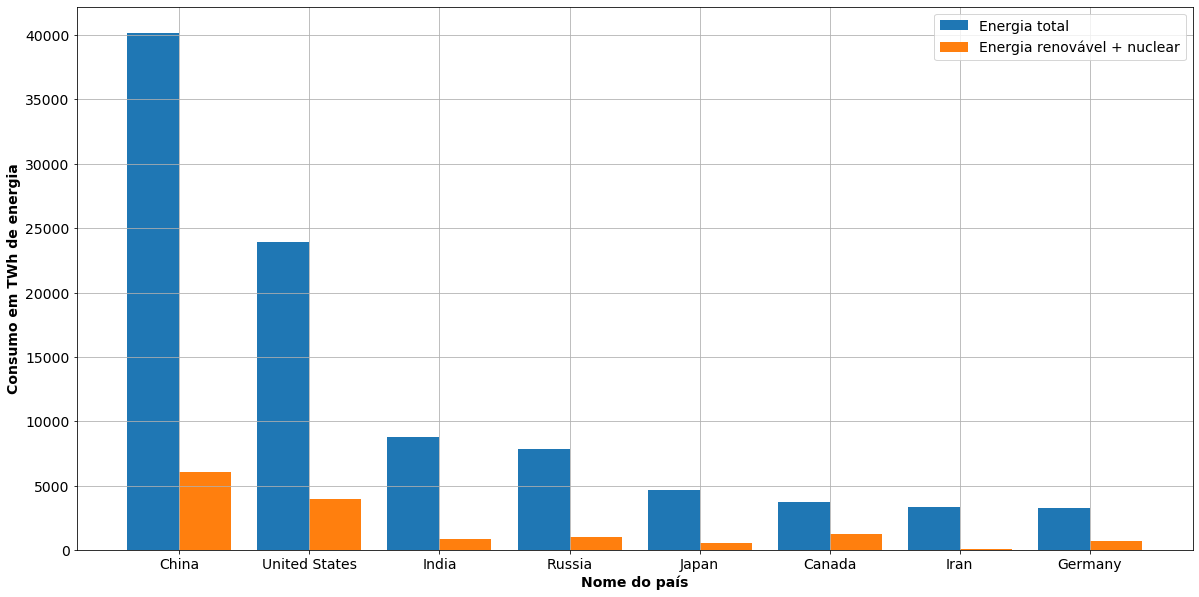

In [25]:
countryEnergy = energySourceCountry
countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']
countryEnergy['total_energy'] = countryEnergy['Coal Consumption - TWh'] + countryEnergy['Oil Consumption - TWh'] + countryEnergy['Gas Consumption - TWh'] + countryEnergy['renewable_nuclear']

countryEnergy = countryEnergy.sort_values(by=['total_energy'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)].iloc[1:9]

X_axis = np.arange(len(countryEnergy))

plt.figure(figsize=(20, 10))
plt.bar(X_axis - 0.2, countryEnergy['total_energy'], 0.4, label = 'Energia total')
plt.bar(X_axis + 0.2, countryEnergy['renewable_nuclear'], 0.4, label = 'Energia renovável + nuclear')
plt.xticks(X_axis, countryEnergy['Entity'])

plt.rcParams["figure.figsize"] = (18,6)
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia', fontweight='bold')
plt.grid()
plt.legend()
plt.show()



Países com maior percentagem de consumo de energia renovável ou nuclear

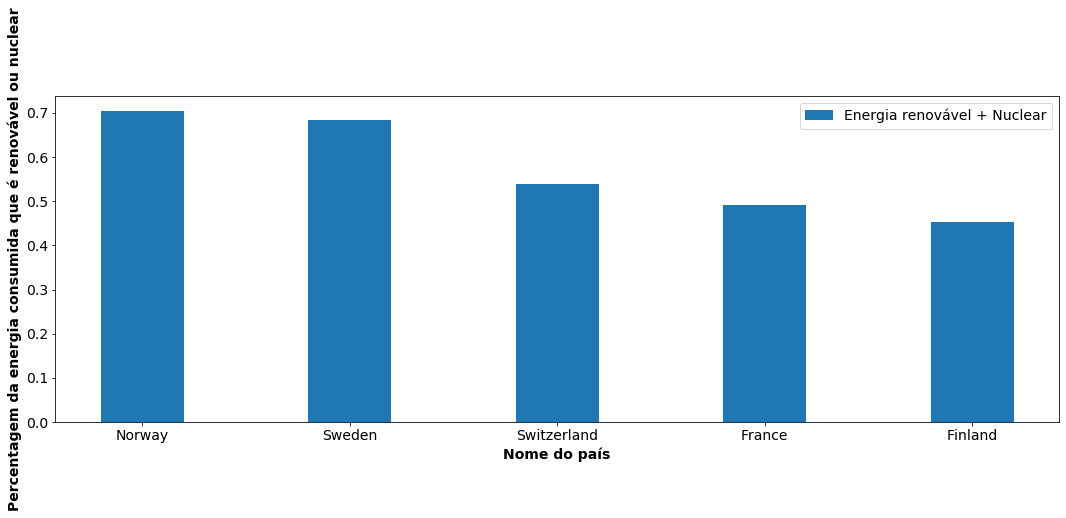

In [26]:
countryEnergy = energySourceCountry
countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']
countryEnergy['total_energy'] = countryEnergy['Coal Consumption - TWh'] + countryEnergy['Oil Consumption - TWh'] + countryEnergy['Gas Consumption - TWh'] + countryEnergy['renewable_nuclear']
countryEnergy['percentage'] = countryEnergy['renewable_nuclear'] / countryEnergy['total_energy']

countryEnergy = countryEnergy.sort_values(by=['percentage'],ascending=False)

cond1 = countryEnergy['Code'].notna()
cond2 = countryEnergy['Year'] == 2020

countryEnergy = countryEnergy.loc[(cond1) & (cond2)].iloc[1:6]

X_axis = np.arange(len(countryEnergy))

plt.bar(X_axis, countryEnergy['percentage'], 0.4, label = 'Energia renovável + Nuclear')
plt.xticks(X_axis, countryEnergy['Entity'])

plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Percentagem da energia consumida que é renovável ou nuclear', fontweight='bold')
plt.legend()
plt.show()

Correlação entre GDP (2020), GDP per capita e o consumo de energias renováveis + nuclear

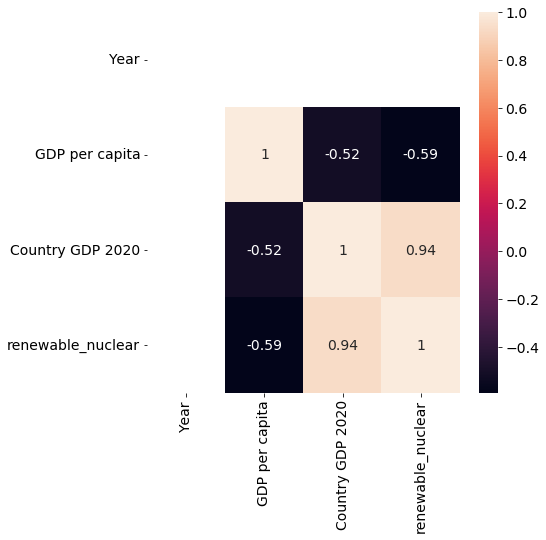

,Entity,Code,Year,GDP per capita,Country GDP 2020,renewable_nuclear
0,France,FRA,"2,020.00000","42,025.61737","2,630,317,731,455.25977","1,167.21744"
1,Switzerland,CHE,"2,020.00000","68,393.30600","752,248,045,730.10999",158.54611
2,Sweden,SWE,"2,020.00000","50,683.32351","541,220,059,459.25000",396.60688
3,Norway,NOR,"2,020.00000","63,585.90351","362,198,318,435.26001",372.78936
4,Finland,FIN,"2,020.00000","47,260.80046","269,594,831,987.54898",128.69200


In [27]:
countryGDP_renewableEnergy= GDP_perCapita_GDPcountries.merge(countryEnergy[['Code','renewable_nuclear']])
correlation = countryGDP_renewableEnergy.corr()

fig = plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '14'
sns.heatmap(correlation, annot=True)
plt.show()

"""correlationDataset = pd.merge(newDataset, countryEnergy, 
                   on=['Code', 'Year', 'Entity'], 
                   how='outer')
correlationDataset
"""
countryGDP_renewableEnergy

#### Pergunta 2: Países que consomem mais energia poluente;

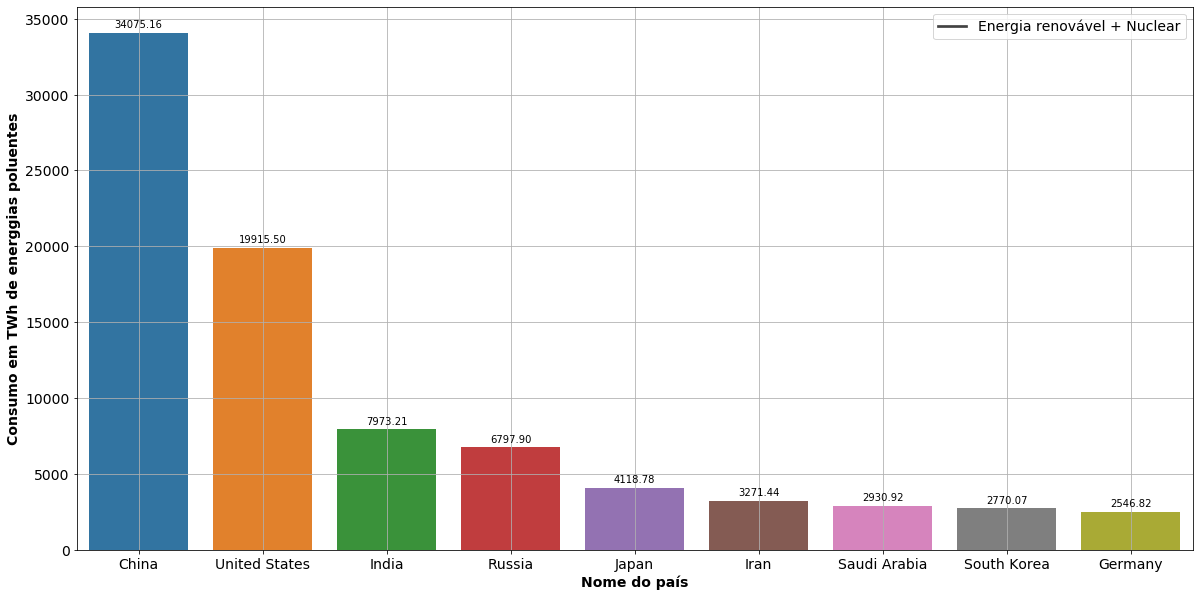

In [28]:
countryPoluentEnergy = energySourceCountry
countryPoluentEnergy['PoluentEnergy'] = countryPoluentEnergy['Coal Consumption - TWh'] + countryPoluentEnergy['Oil Consumption - TWh'] + countryPoluentEnergy['Gas Consumption - TWh']

countryPoluentEnergy = countryPoluentEnergy.sort_values(by=['PoluentEnergy'],ascending=False)

cond1 = countryPoluentEnergy['Code'].notna()
cond2 = countryPoluentEnergy['Year'] == 2020

countryPoluentEnergy = countryPoluentEnergy.loc[(cond1) & (cond2)]
countryPoluentEnergyPlot = countryPoluentEnergy.iloc[1:10]
#countryPoluentEnergyPlot.plot.bar(x='Entity', y='PoluentEnergy', rot=0, grid=True, figsize=(20,10))

countryPoluentEnergyPlot = pd.DataFrame(countryPoluentEnergyPlot, columns=['Entity', 'PoluentEnergy'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="PoluentEnergy", data=countryPoluentEnergyPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energgias poluentes', fontweight='bold')
plt.legend(['Energia renovável + Nuclear'])
plt.show()

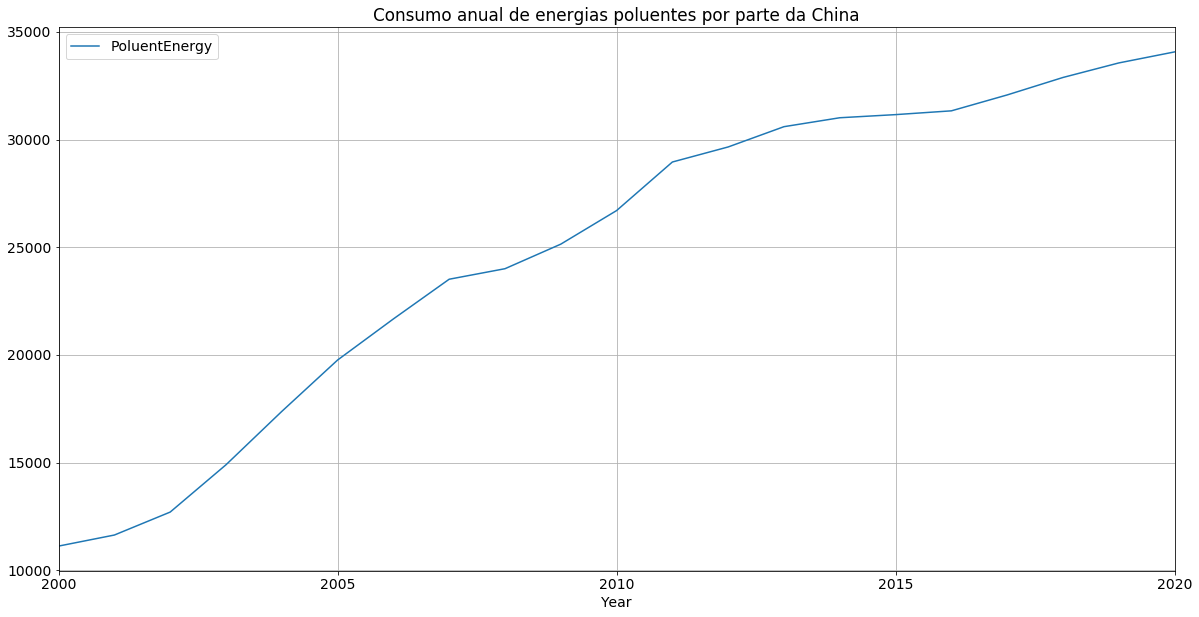

In [29]:
chinaDataset = energySourceCountry.loc[(energySourceCountry['Code'] == 'CHN') & (energySourceCountry['Year'] > 1999)]


ax = chinaDataset[['Year','PoluentEnergy']].groupby(['Year']).sum().plot(rot=0, grid=True, figsize=(20,10))
ax.locator_params(integer=True)
plt.title('Consumo anual de energias poluentes por parte da China')
plt.show()


#### Pergunta 3: Quais são os países que consomem mais energia nuclear?


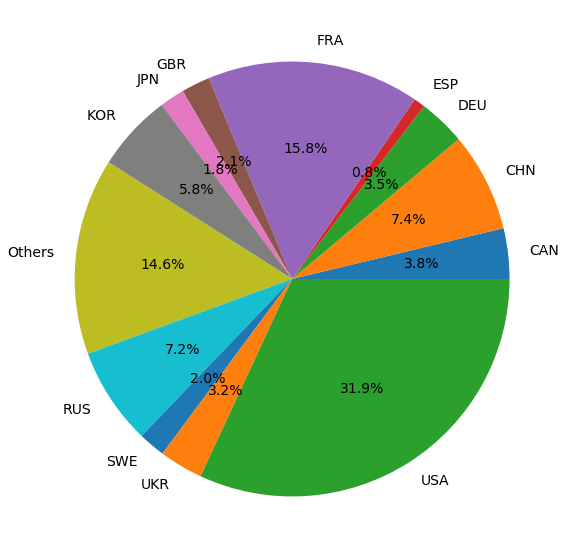

In [30]:
#Quais foram os países que mais consumiram energia nuclear a partir de 2010
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
energySourceCountry1 = energySourceCountry[(~energySourceCountry['Entity'].isin(cond1)) & (energySourceCountry['Code'].notna()) & (energySourceCountry['Year'] >= 2010)]
#energySourceCountry1 = energySourceCountry.loc[energySourceCountry.groupby('Year')['Nuclear Consumption - TWh']]
#energySourceCountry1 = energySourceCountry1.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

soma = energySourceCountry1['Nuclear Consumption - TWh'].sum()
threshold = 0.002 * soma

df_draw = energySourceCountry1.copy()
df_draw.loc[df_draw['Nuclear Consumption - TWh'] < threshold, 'Code'] = 'Others'
df_draw = df_draw.groupby('Code')['Nuclear Consumption - TWh'].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.pie(df_draw['Nuclear Consumption - TWh'], labels=df_draw['Code'], autopct='%1.1f%%');



#energySourceCountry1.groupby(['Code'])['Nuclear Consumption - TWh'].sum().plot.pie(y='Nuclear Consumption - TWh',autopct='%1.1f%%', shadow=True, figsize=(20,10))
#plt.show()
#energySourceCountry1

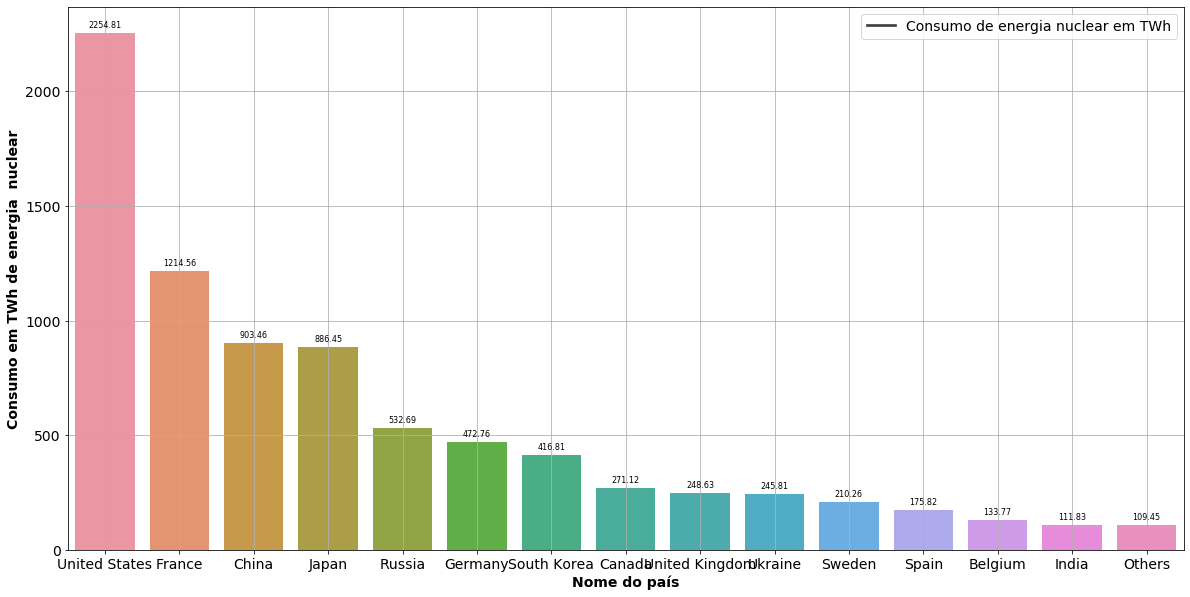

,Entity,Year,Nuclear Consumption - TWh
4729,United States,2007,"2,254.80605"
1573,France,2005,"1,214.55585"
905,China,2020,903.45941
2296,Japan,2000,886.44882
3687,Russia,2020,532.68648
1625,Germany,2001,472.75731
4049,South Korea,2015,416.80968
731,Canada,2014,271.12082
4667,United Kingdom,2001,248.63240
4561,Ukraine,2007,245.81469


In [31]:
#em que ano o país consumiu mais energia nuclear
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']

energySourceCountry2 = energySourceCountry.copy()
energySourceCountry2 = energySourceCountry2[(~energySourceCountry2['Entity'].isin(cond1)) & (energySourceCountry2['Code'].notna()) & (energySourceCountry2['Year'] >= 2000)]
energySourceCountry2.loc[energySourceCountry2['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
energySourceCountry2 = energySourceCountry2.loc[energySourceCountry2.groupby('Entity')['Nuclear Consumption - TWh'].idxmax()]
energySourceCountry2 = energySourceCountry2.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)



energySourceCountry2 = pd.DataFrame(energySourceCountry2, columns=["Entity",'Year', 'Nuclear Consumption - TWh'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Entity", y="Nuclear Consumption - TWh", data=energySourceCountry2)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia nuclear em TWh'])
plt.show()
energySourceCountry2

#NOTA: FALTA COLOCAR NO X AXIS O ANO EM QUE O CONSUMO FOI MAIOR DE FORMA A FICAR ASSIM: (UNITED STATES, 2007)

In [32]:
#Quais foram os países que mais  onsumiram energia nuclear em 2020 comprativamente a 1990
energySourceCountry1 = energySourceCountry.copy()


cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']

energySourceCountry2020 = energySourceCountry.copy()
energySourceCountry2020 = energySourceCountry2020[(~energySourceCountry2020['Entity'].isin(cond1)) & (energySourceCountry2020['Code'].notna()) & (energySourceCountry2020['Year'] == 2020)]
#energySourceCountry2020.loc[energySourceCountry2020['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
#energySourceCountry2020 = energySourceCountry2020.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

energySourceCountry1990 = energySourceCountry.copy()
energySourceCountry1990 = energySourceCountry1990[(~energySourceCountry1990['Entity'].isin(cond1)) & (energySourceCountry1990['Code'].notna()) & (energySourceCountry1990['Year'] == 1990)]
energySourceCountry1990.loc[energySourceCountry1990['Nuclear Consumption - TWh'] < 110, 'Entity'] = 'Others'
energySourceCountry1990 = energySourceCountry1990.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)

energySourceCountry2020 = energySourceCountry2020.iloc[:,[0, 1, 2, 6]]
energySourceCountry2020

,Entity,Code,Year,Nuclear Consumption - TWh
111,Algeria,DZA,2020,0.00000
167,Argentina,ARG,2020,26.30548
279,Australia,AUS,2020,0.00000
335,Austria,AUT,2020,0.00000
371,Azerbaijan,AZE,2020,0.00000
...,...,...,...,...
4686,United Kingdom,GBR,2020,124.04261
4742,United States,USA,2020,"2,051.39389"
4778,Uzbekistan,UZB,2020,0.00000
4834,Venezuela,VEN,2020,0.00000


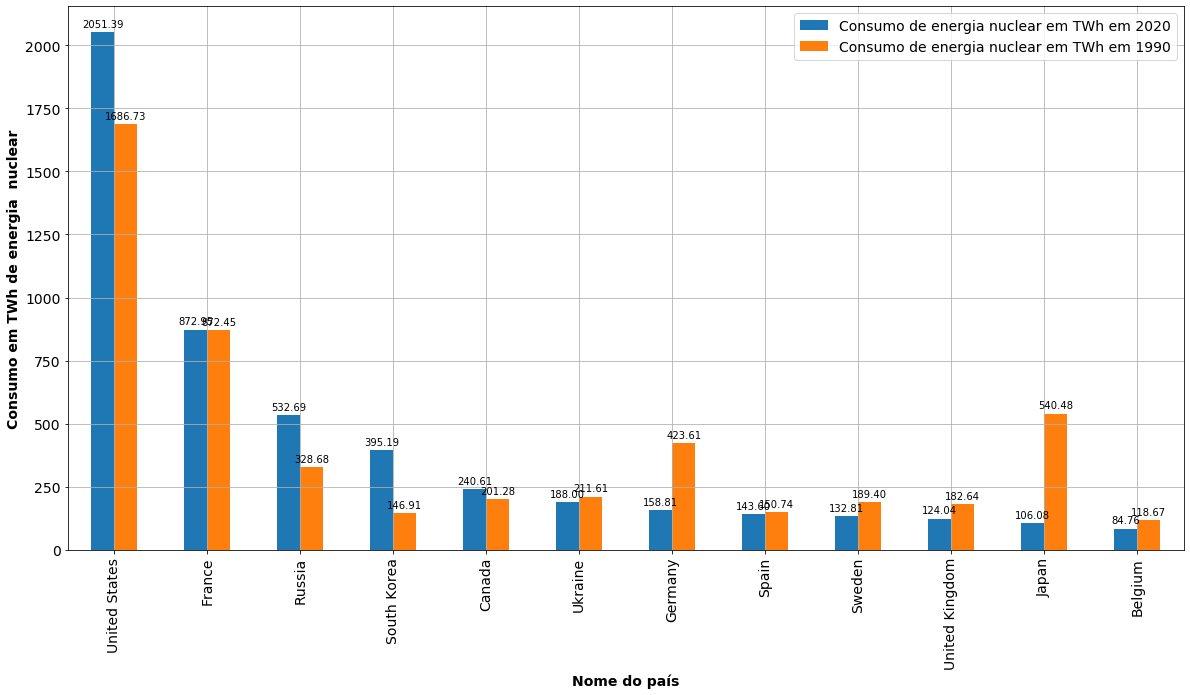

,Entity,Nuclear Consumption - TWh_x,Nuclear Consumption - TWh_y
11,United States,"2,051.39389","1,686.73005"
2,France,872.94821,872.44722
5,Russia,532.68648,328.68060
6,South Korea,395.19249,146.90712
1,Canada,240.61396,201.27778
9,Ukraine,188.00073,211.60833
3,Germany,158.81346,423.61111
7,Spain,143.60294,150.74444
8,Sweden,132.80668,189.40278
10,United Kingdom,124.04261,182.63611


In [33]:
energySourceCountry1990= energySourceCountry1990.iloc[:,[0, 1, 2, 6]]
energySourceCountry1990.rename(columns = {'Year':'Year1990'}, inplace = True)

nuclearEnergy2020_1990 = pd.merge(energySourceCountry2020, energySourceCountry1990, 
                   on=['Code', 'Entity'], 
                   how='right')

nuclearEnergy2020_1990['Nuclear Consumption - TWh_x'] = nuclearEnergy2020_1990['Nuclear Consumption - TWh_x'].replace(np.nan, 0)
nuclearEnergy2020_1990 = nuclearEnergy2020_1990[(nuclearEnergy2020_1990['Entity'] != 'Others')]

nuclearEnergy2020_1990 = nuclearEnergy2020_1990.sort_values(by=['Nuclear Consumption - TWh_x'],ascending=False)

#nuclearEnergy2000_1990 = nuclearEnergy2000_1990.groupby('Entity').mean()
nuclearEnergy2020_1990 = pd.DataFrame(nuclearEnergy2020_1990, columns=['Entity', 'Nuclear Consumption - TWh_x', 'Nuclear Consumption - TWh_y'])
plots = nuclearEnergy2020_1990.plot(x='Entity', y=['Nuclear Consumption - TWh_x', 'Nuclear Consumption - TWh_y'], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia nuclear em TWh em 2020', 'Consumo de energia nuclear em TWh em 1990'])
plt.show()
nuclearEnergy2020_1990





#### Pergunta 4: Transição global para energia renovável

In [34]:

worldDataset = energySourceCountry.loc[(energySourceCountry['Code'] == 'OWID_WRL')]


ax = worldDataset[['Year','renewable']].groupby(['Year']).sum()
ax2 = worldDataset[['Year','PoluentEnergy']].groupby(['Year']).sum()
plt.plot(ax)
plt.plot(ax2)
plt.title('Transição global para energia renovável')
plt.legend(['Energia Renovável', 'Energia poluente'])
plt.ylabel('Consumo em TWh de energia', fontweight='bold')
plt.grid()
plt.show()



KeyError: "['renewable'] not in index"

In [ ]:
ax = worldDataset[['Year', 'PoluentEnergy','renewable']].groupby(['Year']).sum()
ax.plot.bar(stacked=True)

plt.title('Transição global para energia renovável a nível mundial')
plt.grid()
plt.figsize=(20,10)
plt.show()


In [ ]:
worldEnergy2000s = energySourceCountry.loc[(energySourceCountry['Entity'] == 'North America') | (energySourceCountry['Entity'] == 'South & Central America') | (energySourceCountry['Entity'] == 'Europe') | (energySourceCountry['Entity'] == 'Africa') | (energySourceCountry['Entity'] == 'Asia Pacific')]
worldEnergy2000s = worldEnergy2000s.loc[(worldEnergy2000s['Year'] == 2000) | (worldEnergy2000s['Year'] == 2020)]

increase = []
prev = None
for index, value in worldEnergy2000s['renewable'].items():
    if prev == None:
        prev = value
    else:
        increase.append(((value-prev)/abs(prev))*100)
        prev = None

d = {'Africa': increase[0], 'Asia Pacific': increase[1], 'Europe': increase[2], 'North America': increase[3], 'South & Central America': increase[4]}

increase = pd.DataFrame.from_dict(d, orient='index')
increase


ax = increase[0]
ax.plot.barh()

plt.title('Aumento de energia renovável por região (2000-2020)')
plt.grid()
plt.figsize=(20,10)
plt.xlabel('%')
plt.show()

#### Pergunta 5: Países com maior transição para energia renovável a partir de 2000;

In [ ]:
countryEnergyTransitionRenewables = energySourceCountry.copy()

cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryEnergyTransitionRenewables = countryEnergyTransitionRenewables[(~countryEnergyTransitionRenewables['Entity'].isin(cond1)) & (countryEnergyTransitionRenewables['Code'].notna()) & ((countryEnergyTransitionRenewables['Year'] == 2020) | ((countryEnergyTransitionRenewables['Year'] == 2000)) & (countryEnergyTransitionRenewables['renewable'] > 0))]

countryEnergyTransitionRenewables = countryEnergyTransitionRenewables.sort_values(by=['renewable'],ascending=False)
countryEnergyTransitionRenewables = countryEnergyTransitionRenewables.iloc[:,[0, 1, 2, -1]]


countryTotalEnergy = countryEnergyTransitionRenewables.groupby(['Entity', 'Year'])['renewable'].sum()
unstakedValuesCountryEnergy = countryTotalEnergy.unstack()
unstakedValuesCountryEnergy
#unstakedValuesCountryEnergy.columns.tolist()
unstakedValuesCountryEnergy['renewablesTransitionPercentage'] = ((unstakedValuesCountryEnergy[2020] - unstakedValuesCountryEnergy[2000])/ abs(unstakedValuesCountryEnergy[2000])) * 100
unstakedValuesCountryEnergy = unstakedValuesCountryEnergy.sort_values(by=['renewablesTransitionPercentage'],ascending=False).iloc[:20]
unstakedValuesCountryEnergy = unstakedValuesCountryEnergy.reset_index()



unstakedValuesCountryEnergyPlot = pd.DataFrame(unstakedValuesCountryEnergy, columns=['Entity', 'renewablesTransitionPercentage'])
plots = unstakedValuesCountryEnergyPlot.plot(x='Entity', y=['renewablesTransitionPercentage'], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Aumento do consumo de energias renováveis em percentagem', fontweight='bold')
plt.legend(['Aumento do consumo de energia renovável entre 2000 e 2020'])
plt.show()

unstakedValuesCountryEnergy

In [ ]:

unstakedValuesCountryEnergyPlot2 = pd.DataFrame(unstakedValuesCountryEnergy, columns=['Entity', 2000, 2020]).iloc[:-5]
plots = unstakedValuesCountryEnergyPlot2.plot(x='Entity', y=[2000, 2020], kind='bar', figsize=(20,10))

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')


plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia  nuclear', fontweight='bold')
plt.legend(['Consumo de energia nuclear em TWh em 2020', 'Consumo de energia nuclear em TWh em 1990'])
plt.show()

#### Pergunta 6: Países que consomem mais energia;

In [ ]:
#Diferença no consumo de energia entre 1990 e 2020
countryTotalEnergy = energySourceCountry.copy()
#countryEnergy['renewable_nuclear'] = countryEnergy['Nuclear Consumption - TWh'] + countryEnergy['Hydro Consumption - TWh'] + countryEnergy['Wind Consumption - TWh'] + countryEnergy['Solar Consumption - TWh'] + countryEnergy['Geo Biomass Other - TWh']

countryTotalEnergy['allEnergyConsumption'] = countryTotalEnergy.iloc[:,3:11].sum(axis=1)

cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryTotalEnergy = countryTotalEnergy[(~countryTotalEnergy['Entity'].isin(cond1)) & (countryTotalEnergy['Code'].notna()) & ((countryTotalEnergy['Year'] == 2020) | (countryTotalEnergy['Year'] == 1990))]

countryTotalEnergy = countryTotalEnergy.sort_values(by=['allEnergyConsumption'],ascending=False)
countryTotalEnergy = countryTotalEnergy.iloc[:,[0, 1, 2, -1]]

countryTotalEnergy.loc[countryTotalEnergy['allEnergyConsumption'] < 700, 'Entity'] = 'Others'
countryTotalEnergy = countryTotalEnergy[(countryTotalEnergy['Entity'] != 'Others')]

countryTotalEnergy

(countryTotalEnergy.groupby(['Year','Entity'])
   .mean().unstack('Year').plot.bar())

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Consumo em TWh de energia ', fontweight='bold')
plt.legend(['Consumo de energia em TWh em 1990', 'Consumo de energia em TWh em 2020'])
plt.show()



In [ ]:
#Da energia total consumida em 2020, quais foram os responsáveis pelo seu maior consumo
cond1 = ['World', 'OECD', 'Europe', 'North America', 'European Union']
countryTotalEnergy = energySourceCountry.copy()
countryTotalEnergy = countryTotalEnergy[(~countryTotalEnergy['Entity'].isin(cond1)) & (countryTotalEnergy['Code'].notna()) & (countryTotalEnergy['Year'] == 2020)]
#energySourceCountry1 = energySourceCountry.loc[energySourceCountry.groupby('Year')['Nuclear Consumption - TWh']]
#energySourceCountry1 = energySourceCountry1.sort_values(by=['Nuclear Consumption - TWh'],ascending=False)
countryTotalEnergy
soma = energySourceCountry1['total_energy'].sum()
threshold = 0.00009 * soma

df_draw = countryTotalEnergy.copy()
df_draw.loc[df_draw['total_energy'] < threshold, 'Code'] = 'Others'
df_draw = df_draw.groupby('Code')['total_energy'].sum().reset_index()
plt.figure(figsize=(20, 10))
plt.pie(df_draw['total_energy'], labels=df_draw['Code'], autopct='%1.1f%%');



#### Pergunta 7: Correlação entre emissão de CO2 e produção de eletricidade via fontes renováveis;

In [ ]:
co2PerCapitaCorrelation = co2PerCapita.copy()

correlation = co2PerCapitaCorrelation.corr()

fig = plt.figure(figsize=(7, 7))
plt.rcParams['font.size'] = '14'
sns.heatmap(correlation, annot=True)
plt.show()
co2PerCapitaCorrelation

In [ ]:
co2PerCapitaScatter = co2PerCapita.copy()

co2PerCapitaScatter = co2PerCapitaScatter[(co2PerCapitaScatter['Code'].notna()) & (co2PerCapitaScatter['Year'] == 2020) & (co2PerCapitaScatter['Renewables (% electricity)'].notna()) & (co2PerCapitaScatter['Annual CO2 emissions (per capita)'] > 4) &(co2PerCapitaScatter['Renewables (% electricity)'] > 4)]
co2PerCapitaScatter
df = pd.DataFrame(co2PerCapitaScatter, columns=['Entity', 'Annual CO2 emissions (per capita)', 'Renewables (% electricity)'])

plots = df.plot(x='Renewables (% electricity)', y='Annual CO2 emissions (per capita)', kind='scatter', figsize=(20,10))


for idx, row in df.iterrows():
    if ((row['Renewables (% electricity)'] > 8) and (row['Annual CO2 emissions (per capita)'] > 7)):
        plots.annotate(row['Entity'], (row['Renewables (% electricity)'], row['Annual CO2 emissions (per capita)']) )
# force matplotlib to draw the graph
plt.show()


#### Pergunta 8: Países que produzem mais energia

In [ ]:
productionAndSupplyEnergyWorld = productionAndSupplyEnergy.copy()

productionAndSupplyEnergyWorld = productionAndSupplyEnergyWorld[(productionAndSupplyEnergyWorld['Series'] == 'Primary energy production (petajoules)') & (productionAndSupplyEnergyWorld['Country/Region'] == 'Total, all countries or areas')]
productionAndSupplyEnergyWorld['Value'] =  productionAndSupplyEnergyWorld['Value'].replace(',','', regex=True)
productionAndSupplyEnergyWorld['Value'] = productionAndSupplyEnergyWorld['Value'].astype(str).astype(int)


productionAndSupplyEnergyWorldPlot = pd.DataFrame(productionAndSupplyEnergyWorld, columns=['Year', 'Value'])
plots = productionAndSupplyEnergyWorldPlot.plot(x='Year', y='Value', kind='line', figsize=(20,10), xticks=productionAndSupplyEnergyWorldPlot['Year'])

plt.grid()
plt.title('Quantidade de energia produzida em todo o Mundo', fontweight='bold')
plt.xlabel('Ano de produção', fontweight='bold')
plt.ylabel('Produção em petajoules de energia', fontweight='bold')
plt.legend(['Produção de energia em petajoules em todo o Mundo'])
plt.show()

In [ ]:
countryEnergyProduction = productionAndSupplyEnergy.copy()


countryEnergyProduction['Value'] =  countryEnergyProduction['Value'].replace(',','', regex=True)
countryEnergyProduction['Value'] = countryEnergyProduction['Value'].astype(str).astype(int)

cond1 = ['Total, all countries or areas', 'Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceania']
cond2 = countryEnergyProduction['Series'] == 'Primary energy production (petajoules)'
cond3 = countryEnergyProduction['Value'] > 0
cond4 = countryEnergyProduction['Year'] == 2018

countryEnergyProduction = countryEnergyProduction[(~countryEnergyProduction['Country/Region'].isin(cond1)) & (cond2) & (cond3) & (cond4)]
countryEnergyProduction = countryEnergyProduction.sort_values(by=['Value'],ascending=False).iloc[:8]


countryEnergyProductionPlot = pd.DataFrame(countryEnergyProduction, columns=["Country/Region", 'Value'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Country/Region", y="Value", data=countryEnergyProductionPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Produção de Energia em Petajoules', fontweight='bold')
plt.title('Países com maior nível de produção de energia em Petajoules', fontweight='bold')
plt.show()


#### Pergunta 9: Países que importam mais energia;

In [ ]:
countryEnergyNetImports = productionAndSupplyEnergy.copy()


countryEnergyNetImports['Value'] =  countryEnergyNetImports['Value'].replace(',','', regex=True)
countryEnergyNetImports['Value'] = countryEnergyNetImports['Value'].astype(str).astype(int)

cond1 = ['Total, all countries or areas', 'Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceania']
cond2 = countryEnergyNetImports['Series'] == 'Net imports [Imports - Exports - Bunkers] (petajoules)'
cond3 = countryEnergyNetImports['Year'] == 2018

countryEnergyNetImports = countryEnergyNetImports[(~countryEnergyNetImports['Country/Region'].isin(cond1)) & (cond2) & (cond3)]
countryEnergyNetImports = countryEnergyNetImports.sort_values(by=['Value'],ascending=False)

countryEnergyNetImportsTop_Bottom = pd.concat([countryEnergyNetImports.head(5),countryEnergyNetImports.tail(5)])

countryEnergyNetImportsTop_BottomPlot = pd.DataFrame(countryEnergyNetImportsTop_Bottom, columns=["Country/Region", 'Value'])
plt.figure(figsize=(20, 10))
plots = sns.barplot(x="Country/Region", y="Value", data=countryEnergyNetImportsTop_BottomPlot)

#Colocar os valores por cima de cada coluna
for bar in plots.patches:
    
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.grid()
plt.xlabel('Nome do país', fontweight='bold')
plt.ylabel('Importação de Energia em Petajoules', fontweight='bold')
plt.title('Importação líquida de energia', fontweight='bold')
plt.show()


#### Pergunta 10: Correlação entre preço da eletricidade e percentagem de eletricidade proveniente de fontes renováveis;

In [ ]:
electricityPrice2021_DS = electricityPrice2021.copy()
electricityPrice2021_DS.drop(['Global Totals (2021)', 'Rank', 'Continental region', 'Tariffs measured', 'Average price of 1KW/h (local currency)', 'Currency', 'Cheapest 1KW/h (Local currency)', 'Sample date', 'Unnamed: 15'], axis = 1, inplace = True)
electricityPrice2021_DS

countryEnergyProductionConcatenate = productionAndSupplyEnergy.copy()


countryEnergyProductionConcatenate['Value'] =  countryEnergyProductionConcatenate['Value'].replace(',','', regex=True)
countryEnergyProductionConcatenate['Value'] = countryEnergyProductionConcatenate['Value'].astype(str).astype(int)

cond1 = ['Total, all countries or areas', 'Asia', 'North America', 'Europe', 'Africa', 'South America', 'Oceania']
cond2 = countryEnergyProductionConcatenate['Series'] == 'Primary energy production (petajoules)'
cond3 = countryEnergyProductionConcatenate['Value'] > 0
cond4 = countryEnergyProductionConcatenate['Year'] == 2018

countryEnergyProduction = countryEnergyProduction[(~countryEnergyProduction['Country/Region'].isin(cond1)) & (cond2) & (cond3) & (cond4)]

